In [220]:

# This tells matplotlib not to try opening a new window for each plot.
%matplotlib inline

# Import a bunch of libraries.
import time
import numpy as np
import matplotlib.pyplot as plt
import sklearn
import math
from sklearn import neighbors
from sklearn import datasets, linear_model
from matplotlib.ticker import MultipleLocator
from sklearn.pipeline import Pipeline
from sklearn.datasets import fetch_mldata
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix
from sklearn.linear_model import LinearRegression
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.naive_bayes import GaussianNB
from sklearn.grid_search import GridSearchCV
from sklearn.metrics import classification_report

# Set the randomizer seed so results are the same each time.
np.random.seed(0)

In [221]:
# Load the digit data either from mldata.org, or once downloaded to data_home, from disk. The data is about 53MB so this cell
# should take a while the first time your run it.
mnist = fetch_mldata('MNIST original', data_home='~/datasets/mnist')
X, Y = mnist.data, mnist.target

# Rescale grayscale values to [0,1].
X = X / 255.0

# Shuffle the input: create a random permutation of the integers between 0 and the number of data points and apply this
# permutation to X and Y.
# NOTE: Each time you run this cell, you'll re-shuffle the data, resulting in a different ordering.
shuffle = np.random.permutation(np.arange(X.shape[0]))
X, Y = X[shuffle], Y[shuffle]

print ('data shape: ', X.shape)
print ('label shape:', Y.shape)

# Set some variables to hold test, dev, and training data.
test_data, test_labels = X[61000:], Y[61000:]
dev_data, dev_labels = X[60000:61000], Y[60000:61000]
train_data, train_labels = X[:60000], Y[:60000]
mini_train_data, mini_train_labels = X[:1000], Y[:1000]

('data shape: ', (70000, 784))
('label shape:', (70000,))


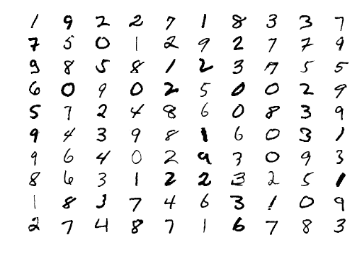

In [222]:
def P1(num_examples=10):
    fig = plt.figure()
    pixels = mini_train_data
    for i in range(num_examples*10):
        plt.subplot(10,10,i+1)
        plt.imshow(pixels[i].reshape((28,28)), cmap='Greys')
        plt.axis('off')
    
plt.show()
    


P1(10)

In [223]:
def P2(k_values):
    for items in k_values:
        clf = neighbors.KNeighborsClassifier(items)
        clf.fit(mini_train_data, mini_train_labels)
        predicted = clf.predict(dev_data)
        print '\nAccuracy for k = %s: %f\n' %(items, sklearn.metrics.accuracy_score(predicted, dev_labels))
    print 'Classification report for k=1'
    print classification_report(dev_labels, predicted)
    print 'We can see 9 is the most difficult digit to predict\
with the lowest f1-score at 0.80'

k_values = [3, 5, 7, 9, 1]
P2(k_values)


Accuracy for k = 3: 0.878000


Accuracy for k = 5: 0.869000


Accuracy for k = 7: 0.865000


Accuracy for k = 9: 0.863000


Accuracy for k = 1: 0.888000

Classification report for k=1
             precision    recall  f1-score   support

        0.0       0.91      0.98      0.94        99
        1.0       0.89      1.00      0.94       105
        2.0       0.99      0.79      0.88       102
        3.0       0.77      0.87      0.82        86
        4.0       0.89      0.82      0.85       104
        5.0       0.93      0.84      0.88        91
        6.0       0.94      0.96      0.95        98
        7.0       0.89      0.92      0.90       113
        8.0       0.94      0.88      0.91        96
        9.0       0.78      0.82      0.80       106

avg / total       0.89      0.89      0.89      1000

We can see 9 is the most difficult digit to predictwith the lowest f1-score at 0.80


In [224]:
def P3(train_sizes, accuracies):
    for items in train_sizes:
        start = time.time()
        train_data, train_labels = X[:items], Y[:items]
        clf = neighbors.KNeighborsClassifier(1)
        clf.fit(train_data, train_labels)
        predicted = clf.predict(dev_data)
        end = time.time()
        process_time = (end-start)
        accuracies.append(sklearn.metrics.accuracy_score(predicted, dev_labels))
        print 'Time for train size in seconds %s: %f' %(items, process_time)
    return(accuracies)


train_sizes = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
accuracies = []
P3(train_sizes, accuracies)

Time for train size in seconds 100: 0.090854
Time for train size in seconds 200: 0.196661
Time for train size in seconds 400: 0.384993
Time for train size in seconds 800: 0.788569
Time for train size in seconds 1600: 1.616798
Time for train size in seconds 3200: 3.210718
Time for train size in seconds 6400: 6.786700
Time for train size in seconds 12800: 14.460300
Time for train size in seconds 25000: 32.014399


[0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

In [225]:
regr = linear_model.LinearRegression()

acc_data = [0.71999999999999997,
 0.78600000000000003,
 0.84099999999999997,
 0.88400000000000001,
 0.90200000000000002,
 0.92600000000000005,
 0.93700000000000006,
 0.95899999999999996,
 0.96999999999999997]

acc_new = np.reshape(acc_data, (-1,1))
print acc_new
acc_labels = [100, 200, 400, 800, 1600, 3200, 6400, 12800, 25000]
acc_labels_log = []
for items in acc_labels:
    acc_labels_log.append(math.log(items))

acc_labels_new = np.reshape(acc_labels, (-1, 1))
regr.fit(acc_labels_new, acc_new)
print long(float(regr.predict(60000)))

acc_labels_log = np.reshape(acc_labels_log, (-1, 1))
regr.fit(acc_labels_log, acc_new)
#print'Coefficients: \n', regr.coef_
print long(float(regr.predict(math.log(60000))))
print 'for n=60,000, the accuracy prediction jumps to 100%, which is unreasonable. This is due to overfitting.'


[[ 0.72 ]
 [ 0.786]
 [ 0.841]
 [ 0.884]
 [ 0.902]
 [ 0.926]
 [ 0.937]
 [ 0.959]
 [ 0.97 ]]
1
1
for n=60,000, the accuracy prediction jumps to 100%, which is unreasonable. This is due to overfitting.


[[ 97   0   0   0   0   0   2   0   0   0]
 [  0 105   0   0   0   0   0   0   0   0]
 [  4   4  81   4   0   0   0   4   3   2]
 [  1   0   0  75   0   3   0   3   1   3]
 [  0   2   0   0  85   0   3   0   0  14]
 [  2   0   0   9   0  76   0   1   1   2]
 [  1   1   1   0   1   0  94   0   0   0]
 [  1   4   0   1   1   0   0 104   0   2]
 [  0   2   0   5   0   2   1   0  84   2]
 [  1   0   0   3   9   1   0   5   0  87]]
The most confused pair of digist are 9 and 4, with 11 misinterpretations


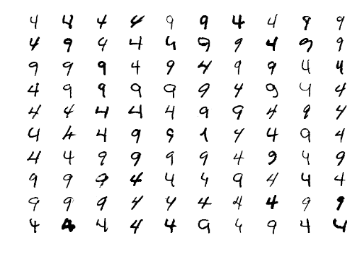

In [226]:
clf = neighbors.KNeighborsClassifier(1)
clf.fit(mini_train_data, mini_train_labels)
predicted = clf.predict(dev_data)
print sklearn.metrics.confusion_matrix(dev_labels, predicted)
print 'The most confused pair of digist are 9 and 4, with 11 misinterpretations'

k=0
for a, (i,j) in enumerate(zip(dev_labels, dev_data)):
    if (i == 4 or i == 9) and k<=99:
        k+=1
        plt.subplot(10,10,k)
        plt.imshow(dev_data[a].reshape((28,28)), cmap='Greys')
        plt.axis('off')
    else:
        continue

In [227]:
from scipy.ndimage import gaussian_filter

mini_train_data_blur = []
dev_data_blur = []

for items in mini_train_data:
    mini_train_data_blur.append(gaussian_filter(items, sigma=1.5))
    
for items in dev_data:
    dev_data_blur.append(gaussian_filter(items, sigma=1.5))

def P6(training_data, development_data):    
    clf = neighbors.KNeighborsClassifier(1)
    clf.fit(training_data, mini_train_labels)
    predicted = clf.predict(development_data)
    print sklearn.metrics.accuracy_score(predicted, dev_labels)    

P6(mini_train_data_blur, dev_data) #preprocess train data
P6(mini_train_data, dev_data_blur) #preprocess dev data
P6(mini_train_data_blur, dev_data_blur) #preprocess train and dev data


0.885
0.865
0.885


In [228]:
import warnings
warnings.filterwarnings('ignore')
from sklearn.naive_bayes import BernoulliNB
from sklearn.naive_bayes import MultinomialNB

mini_train_data_binarized = []
dev_data_binarized = []
#mini_train_data_binarized.append(sklearn.preprocessing.binarize(mini_train_data[0], threshold=0.50))

for items in mini_train_data:
    mini_train_data_binarized.append(sklearn.preprocessing.binarize(items, threshold=0.50))

#for items in dev_data:
 #   dev_data_binarized.append(sklearn.preprocessing.binarize(items, threshold=0.50))

clf = BernoulliNB()
print len(mini_train_data_binarized)
print np.squeeze(mini_train_data_binarized).shape
print np.shape(mini_train_labels)

clf.fit(np.squeeze(mini_train_data_binarized), mini_train_labels)
predicted = clf.predict(dev_data)
print sklearn.metrics.accuracy_score(predicted, dev_labels)

#for items in mini_train_data[0]:
 #   print items

mini_train_data_trinarized = []

print len(mini_train_data)

for values in mini_train_data:
    for items in values:
        if items < 0.33:
            items = 0
        elif 0.33 <= items <0.66:
            items = 1
        elif items >= 0.66:
            items = 2
        mini_train_data_trinarized.append(items)
        
mtd_trinarized = (np.reshape(mini_train_data_trinarized, (1000, 784)))

clf = MultinomialNB()
clf.fit(mtd_trinarized, mini_train_labels)
predicted = clf.predict(dev_data)
print sklearn.metrics.accuracy_score(predicted, dev_labels)

print "The multiclass version improved the results slightly. This is because we have more features to predict on"

1000
(1000, 784)
(1000,)
0.796
1000
0.798
The multiclass version improved the results slightly. This is because we have more features to predict on


In [229]:
def P8(alphas):
    clf = GridSearchCV(BernoulliNB(), alphas)
    clf.fit(np.squeeze(mini_train_data_binarized), mini_train_labels)
    predicted = clf.predict(dev_data)
    print sklearn.metrics.accuracy_score(predicted, dev_labels)
    print clf.best_params_
    
### STUDENT END ###

alphas = {'alpha': [0.0, 0.0001, 0.001, 0.01, 0.1, 0.5, 1.0, 2.0, 10.0]}
nb = P8(alphas)

clf2 = BernoulliNB(alpha = 0.0)
clf2.fit(np.squeeze(mini_train_data_binarized), mini_train_labels)
predicted = clf2.predict(dev_data)
print sklearn.metrics.accuracy_score(predicted, dev_labels)


0.793
{'alpha': 0.01}
0.099


In [230]:
gnb = GaussianNB()
gnb.fit(mini_train_data, mini_train_labels)
gnb.sigma_ = gnb.sigma_ + 1.0e-2
predicted = gnb.predict(dev_data)
print sklearn.metrics.accuracy_score(predicted, dev_labels)

print "The sigma was too small, causing complete separation and now allowing us to classify \
accurately. By decresing the sigma, we prevent complete separation from occuring."

0.789
The sigma was too small, causing complete separation and now allowing us to classify accurately. By decresing the sigma, we prevent complete separation from occuring.


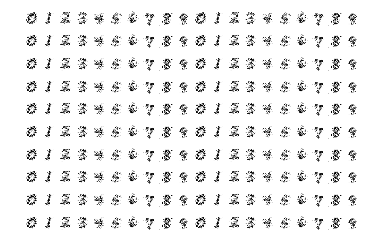

In [231]:
bnb = BernoulliNB(binarize=0.5)
bnb.fit(train_data, train_labels)
bnb_probs = np.exp(bnb.feature_log_prob_)
pixels1 = np.random.rand(20,784)
pixels1_binarized = []

for a in range(20):
    for i,j in zip(pixels1, bnb_probs):
        pixels1_binarized.append(sklearn.preprocessing.binarize(i, threshold=(1-j)))

for i in range(200):
    plt.subplot(10,20,i+1)
    plt.imshow(pixels1_binarized[i].reshape((28,28)), cmap='Greys')
    plt.axis('off')
    
plt.show()

In [232]:
def P11(buckets, correct, total):
    bnb = BernoulliNB(alpha = 0.01, binarize=0.5)
    bnb.fit(mini_train_data, mini_train_labels)
    correct_ans = (bnb.predict(dev_data)==dev_labels).astype(float)
    max_proba = np.amax(bnb.predict_proba(dev_data), axis=1)
    for c, p in zip(correct_ans, max_proba):
        bucket = bucket_list(buckets, p)
        correct[bucket] += c
        total[bucket] += 1

def bucket_list(buckets, value):
    for items in range(len(buckets)):
        if value < buckets[items]:
            return items
    return len(buckets)-1

buckets = [0.5, 0.9, 0.999, 0.99999, 0.9999999, 0.999999999, 0.99999999999, 0.9999999999999, 1.0]
correct = [0 for i in buckets]
total = [0 for i in buckets]

P11(buckets, correct, total)

for i in range(len(buckets)):
    #accuracy = 0.0
    if (total[i] > 0): 
        accuracy = correct[i] / total[i]
        print correct[i], total[i]
        print 'p(pred) <= %.13f    total = %3d    accuracy = %.3f' %(buckets[i], total[i], accuracy)
    


6.0 30
p(pred) <= 0.9000000000000    total =  30    accuracy = 0.200
40.0 86
p(pred) <= 0.9990000000000    total =  86    accuracy = 0.465
52.0 85
p(pred) <= 0.9999900000000    total =  85    accuracy = 0.612
40.0 58
p(pred) <= 0.9999999000000    total =  58    accuracy = 0.690
46.0 61
p(pred) <= 0.9999999990000    total =  61    accuracy = 0.754
64.0 73
p(pred) <= 0.9999999999900    total =  73    accuracy = 0.877
63.0 75
p(pred) <= 0.9999999999999    total =  75    accuracy = 0.840
507.0 532
p(pred) <= 1.0000000000000    total = 532    accuracy = 0.953
